# Correlation and relationships

In this code along, we're going to quantify linear relationships between several variables. In addtion, we will see how to compute the correlation matrix and how to plot it using a heatmap.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's load some data

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now let's plot the data and see if we can splot a linear relationship between any pair of variables:

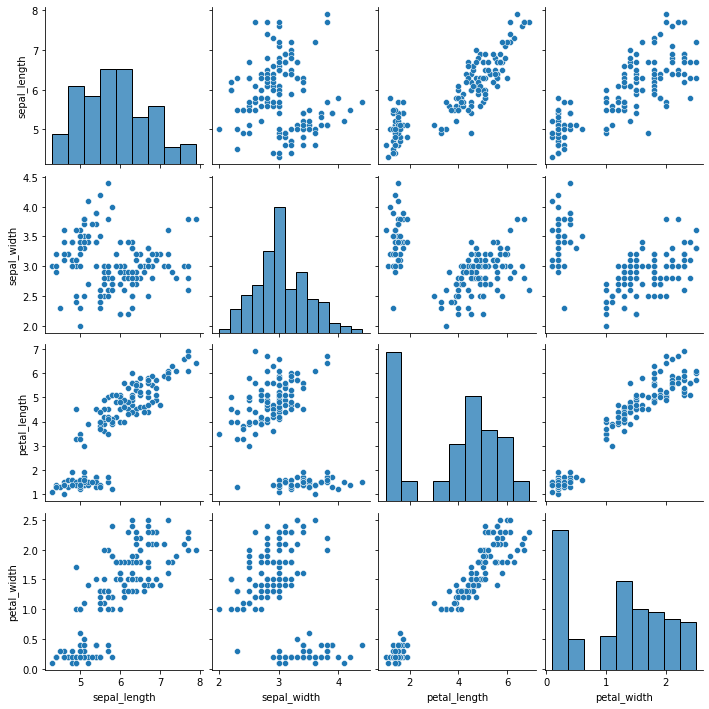

In [3]:
sns.pairplot(iris);

Considering the data globally, we can easilly see a kind of linear relationship between `petal_width` and `petal_length`. Let's quantify this linear relationship computing the correlation matrix.

In [ ]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


As it can be seen from the table, certainly there is a positive correlation between `petal_width` and `petal_length` of 0.96. In addition the table shows also a high correlation between `sepal_length` and `petal_length` ( 0.87 ) and between `sepal_length`and `petal_width` ( 0.82 ).

A couple of interesting things can be seen from the table:

* The correlation matrix is symmetrical around the diagonal
* The elements of the diagonal are allways one

This reduces the amount of correlations to compute, as we only need the elements above or below the diagonal.

However, this analysis didn't took into account the species of flower. Let's see how things changes if we take the species into account.

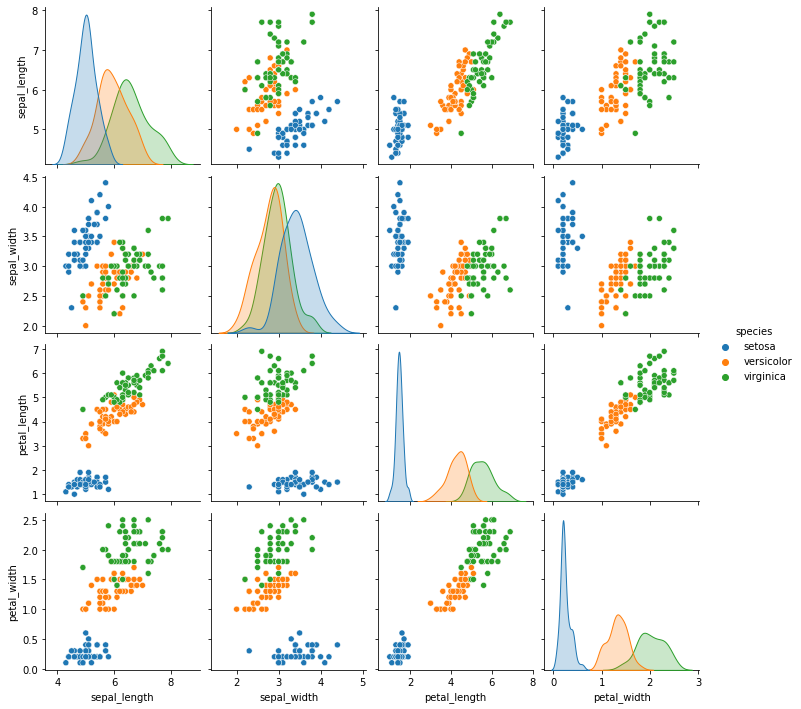

In [ ]:
sns.pairplot(iris, hue = "species");

From the previous figure, it can be seen that the linear relationships found before are still present but the trends are not the same and depends heavilly on the species.

Let's consider only `vericolor` flowers and compute the correlation between the variables. To do this we need to filter the data of our dataframe.

In [ ]:
versicolor = iris[iris['species'] == "versicolor"]
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [ ]:
versicolor.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


As you can see, the correlations change a lot for `versicolor`

Usually, as *rule of thumb* values of correlation above 0.75 ( in absolute values ) can be considered as `high`. 

This dataset doesn't have too much columns. Therefore, spoting a high value on the matrix is easy. However, real datasets have lots of columns and therefore it hard to spot high values on a correlation matrix. For this reason, it always a good practice to plot the correlation matrix using a heatmap.

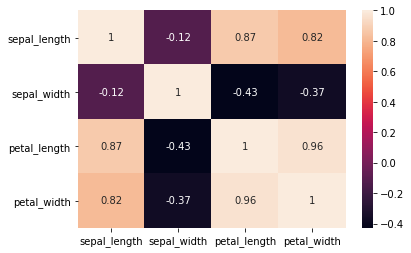

In [ ]:
corr_mat = iris.corr()
sns.heatmap(corr_mat, annot=True);

Clearly, high correlation values can be found more easily than in the matrix, considering only the color.

We could wonder how to retrieve a particular value from the matrix. To this end we can use: 

* .loc
* .iloc

In the first case we retrieve the values based on row/columns **names**, while in the second we retrieve the values based on row/columsn **implicit index**

Using .loc

In [ ]:
corr_mat.loc["petal_width","petal_length"]

0.9628654314027955

In contrast .iloc uses the implicit index. In Pandas dataframes, both columns and rows, have an implicit index ( starting on 0 ) like any Python list. Therefore, in order to retrieve the same values as before using .iloc we need to type:

In [ ]:
corr_mat.iloc[3,2]

0.9628654314027955